In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [2]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C', 'L', 'D', 'S']] for x in ['1C', '5Q', '2I', '5P']], [])
# measurements_RINEX = ['L1C', 'L5Q']
# # 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

device_folder = "../.data/2023_Dataset_Hervanta/S3_dynamic_hervanta/raw"
reference_folder = "../.data/2023_Dataset_Hervanta/S3_dynamic_hervanta/_reference/rover"

rinex_ref = RinexReader('Reference', 
            filepath=f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.23O",
            tlim=[], meas=measurements_RINEX, sampling=1)

log = LogReader(manufacturer="Google", device="Pixel 7", acronym='GP7', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixel7_20230811141817.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="Google", device="Pixel Watch", acronym='GPW', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixelWatch_20230811141922.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="OnePlus", device="Nord 2", acronym='ON2', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_OnePlusNord2_20230811141819.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="Samsung", device="A52", acronym='A52', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_SamsungA52_20230811141745.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="Xiaomi", device="11T", acronym='X11', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_Xiaomi11_20230811141828.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

device_list = [log.device for log in logs]

In [3]:
# Output folder
output = '../.output/S3'

In [4]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


,CarrierFrequencyHz
datetime,
2023-08-11 11:19:00.721,1.176450e+09
2023-08-11 11:19:07.597,1.176450e+09
2023-08-11 11:19:08.599,1.176450e+09
2023-08-11 11:19:13.611,1.176450e+09
2023-08-11 11:19:15.623,1.176450e+09
...,...
2023-08-11 11:59:55.699,1.176450e+09
2023-08-11 11:59:56.603,1.176450e+09
2023-08-11 11:59:57.619,1.176450e+09


In [5]:
log.pos.df

,provider,timestamp,latitude,longitude,altitude
datetime,,,,,
2023-08-11 11:17:28,REF,1.691753e+09,61.449226,23.856271,163.0427
2023-08-11 11:17:29,REF,1.691753e+09,61.449226,23.856272,163.0478
2023-08-11 11:17:30,REF,1.691753e+09,61.449224,23.856279,162.9839
2023-08-11 11:17:31,REF,1.691753e+09,61.449224,23.856279,162.9672
2023-08-11 11:17:32,REF,1.691753e+09,61.449224,23.856279,162.9656
...,...,...,...,...,...
2023-08-11 12:00:13,REF,1.691755e+09,61.449223,23.856267,163.0055
2023-08-11 12:00:14,REF,1.691755e+09,61.449223,23.856267,163.0068
2023-08-11 12:00:15,REF,1.691755e+09,61.449223,23.856266,163.0008


In [6]:
log.ref.df

,time,sv,signal,doppler,phase,pseudorange,snr,prn,system,frequency,pseudorange_rate,pseudorange_error,phase_rate,phase_error,doppler_error
0,2023-08-11 11:17:46,C05,2I,-29.660,2.085740e+08,4.005444e+07,39.652,C05-L1,C,L1,NaN,NaN,NaN,NaN,NaN
1,2023-08-11 11:17:46,C06,2I,481.471,1.950053e+08,3.744872e+07,45.316,C06-L1,C,L1,NaN,NaN,NaN,NaN,NaN
2,2023-08-11 11:17:46,C09,2I,1004.410,1.977734e+08,3.798030e+07,46.057,C09-L1,C,L1,NaN,NaN,NaN,NaN,NaN
3,2023-08-11 11:17:46,C16,2I,309.883,1.972789e+08,3.788533e+07,47.809,C16-L1,C,L1,NaN,NaN,NaN,NaN,NaN
4,2023-08-11 11:17:46,C20,2I,3338.100,1.329851e+08,2.553840e+07,42.997,C20-L1,C,L1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116026,2023-08-11 12:00:35,R15,1C,-2083.357,1.215335e+08,2.274341e+07,45.770,R15-L1,R,L1,389.796,0.117,2082.939,0.683,-0.728
116027,2023-08-11 12:00:35,R16,1C,1672.895,1.178705e+08,2.206568e+07,48.100,R16-L1,R,L1,-313.213,0.148,-1673.140,0.763,-0.359
116028,2023-08-11 12:00:35,R22,1C,-3975.088,1.148802e+08,2.152100e+07,48.722,R22-L1,R,L1,744.642,0.079,3974.938,0.357,-0.322
116029,2023-08-11 12:00:35,R23,1C,-38.200,1.048804e+08,1.960636e+07,49.365,R23-L1,R,L1,7.073,0.158,37.816,0.792,-0.806


In [7]:
# only keep GPS provider
log.fix = log.fix.loc[log.fix["provider"] == 'GPS']

In [8]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
stats=[]
for log in logs:

    #log.fix = log.fix.loc[log.fix['provider'].isin(['GPS'])]

    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["provider", "east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')
    
    log.diff['provider'] = log.diff['provider'].fillna('GPS')
    log.diff = log.diff[['provider', "east", "north", "up", '2D_error', '3D_error']]

    df = log.diff[["east", "north", "up", '2D_error', '3D_error']].dropna().describe(percentiles=[0.5])
    stats.append(df.T[['mean', 'std']])
stats = pd.concat(stats, keys=device_list, axis=1).T.applymap(lambda x: f"{x:0.3f}")
stats

east   north       up 2D_error 3D_error
Pixel 7     mean  -0.434   1.040   -5.256    4.808    8.045
            std    3.359   4.977    5.615    3.768    5.635
Pixel Watch mean  -0.024   1.810   -0.661    3.616    5.493
            std    2.290   4.551    5.498    4.019    5.450
Nord 2      mean  -0.677   3.771  -12.473   10.467   18.066
            std    8.928   8.038    9.570    7.028    8.929
A52         mean  -8.516  -0.529   -1.653   13.030   15.814
            std   26.865   7.447   13.730   26.080   28.126
11T         mean  -2.150   2.359   -7.482    7.322   11.578
            std    7.576   5.934    8.829    7.012   10.132

In [9]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{lllll}
\toprule
  east &  north &      up & 2D\_error & 3D\_error \\
\midrule
-0.434 &  1.040 &  -5.256 &    4.808 &    8.045 \\
 3.359 &  4.977 &   5.615 &    3.768 &    5.635 \\
-0.024 &  1.810 &  -0.661 &    3.616 &    5.493 \\
 2.290 &  4.551 &   5.498 &    4.019 &    5.450 \\
-0.677 &  3.771 & -12.473 &   10.467 &   18.066 \\
 8.928 &  8.038 &   9.570 &    7.028 &    8.929 \\
-8.516 & -0.529 &  -1.653 &   13.030 &   15.814 \\
26.865 &  7.447 &  13.730 &   26.080 &   28.126 \\
-2.150 &  2.359 &  -7.482 &    7.322 &   11.578 \\
 7.576 &  5.934 &   8.829 &    7.012 &   10.132 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4548/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


In [10]:
log.diff

,provider,east,north,up,2D_error,3D_error
datetime,,,,,,
2023-08-11 11:19:06.092,GPS,-13.577256,58.209960,-153.937111,59.772413,165.134416
2023-08-11 11:19:07.000,GPS,-19.825691,45.839596,-128.879587,49.943234,138.218213
2023-08-11 11:19:08.000,GPS,-26.707602,32.213841,-101.290295,41.845281,109.593573
2023-08-11 11:19:09.000,GPS,-33.589406,18.589423,-73.700303,38.390296,83.099636
2023-08-11 11:19:10.000,GPS,-40.475478,4.968683,-46.118811,40.779310,61.562138
...,...,...,...,...,...,...
2023-08-11 12:00:13.000,GPS,0.727708,2.048481,-5.694500,2.173898,6.095339
2023-08-11 12:00:14.000,GPS,0.725094,2.047701,-5.693200,2.172289,6.093551
2023-08-11 12:00:15.000,GPS,0.696289,2.047812,-5.699200,2.162950,6.095837


# Results

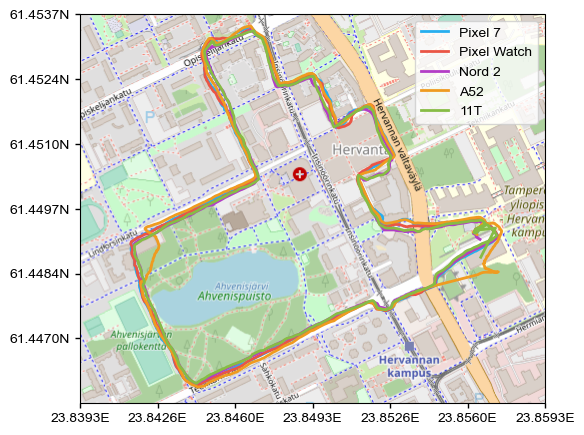

In [11]:
center = [61.4497, 23.8493]
extent = [center[1] - 0.01, center[1] + 0.01, center[0] - 0.004, center[0] + 0.004]

locations = {}
for log in logs:
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
#locations['Reference'] = log.pos.df[["latitude", "longitude"]]
plotMap(locations=locations, extent=extent, scale=15)

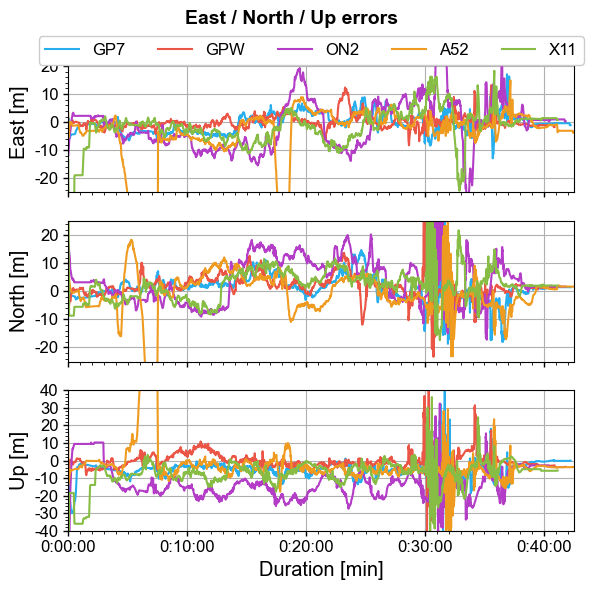

In [12]:
plotENU(logs, lim=[25,25,40], yticks=[2, 10, 2, 10, 2, 10], xticks=[60, 600], mode='difference', save=f"{output}/s3_enu")

In [13]:
def plotStatisticsENU(logs, lim, ticks, mode='violin'):

    for log in logs:
        
        minor_ticks = ticks[0]
        major_ticks = ticks[1]

        fig, axs = plt.subplots(1, figsize=(4,4))

        axs.set_title(f"{log.manufacturer} {log.acronym}")
        
        pos = log.diff.loc[log.diff['provider'].isin(['GPS']), ["east", "north", "up"]].dropna()
        data = [pos['east'], pos['north'], pos['up']]

        if mode == 'violin':
            axs.violinplot(data, showmeans=False, showmedians=True)
        elif mode == 'box':
            axs.boxplot(data, showmeans=True, showfliers=False)
        
        axs.set_xticks([y + 1 for y in range(len(data))], labels=['East', 'North', 'Up'])

        axs.yaxis.set_major_locator(MultipleLocator(major_ticks))
        axs.yaxis.set_major_formatter('{x:.0f}')
        axs.yaxis.set_minor_locator(MultipleLocator(minor_ticks))

        axs.set_ylabel("Error [m]")

        plt.ylim(-lim, lim)

        handles, labels = axs.get_legend_handles_labels()
        fig.tight_layout()


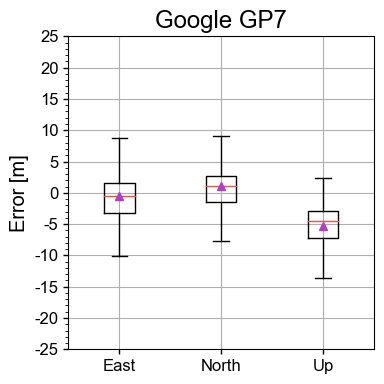

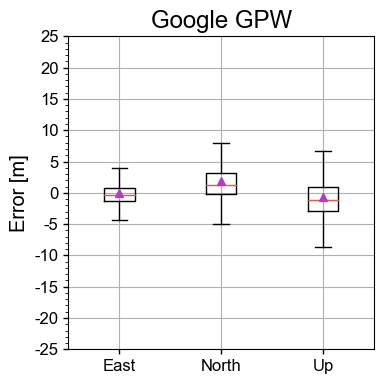

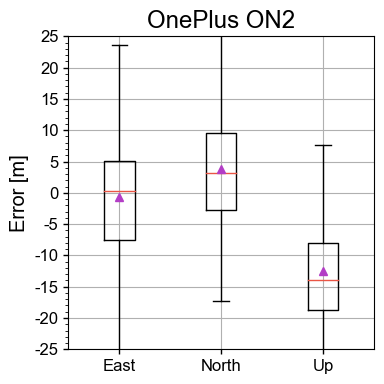

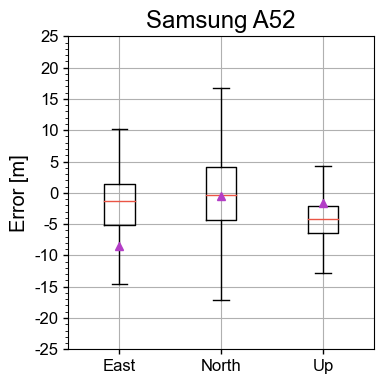

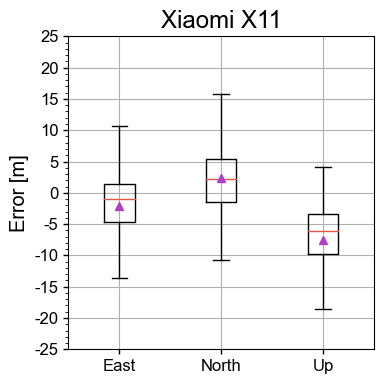

In [14]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

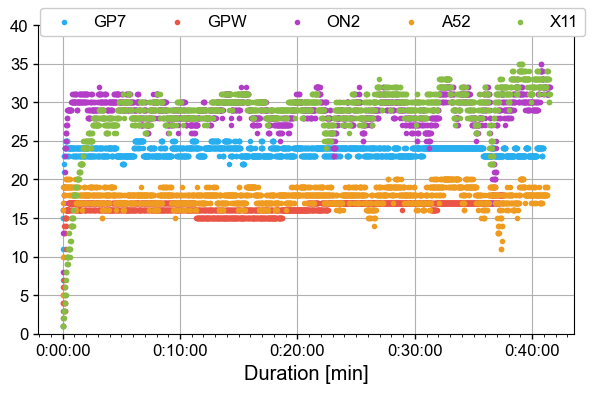

In [15]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 600], mode='signal', save=f"{output}/s3_signals_epoch")

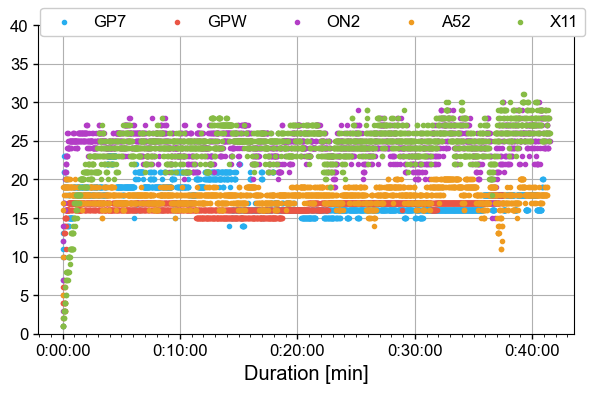

In [16]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 600], mode='satellite', save=f"{output}/s3_sats_epoch")

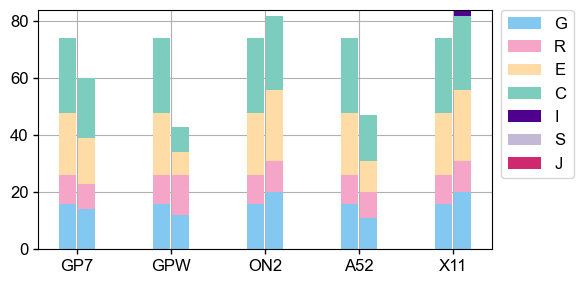

In [17]:
plotBarSignalsPerSystem(logs, save=f"{output}/s3_sats_hist")

In [18]:
df = statsSignalsPerSystem(logs, percent=True)
print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))

/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: divide by zero encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100
/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: invalid value encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100
/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: invalid value encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100


\begin{tabular}{lrrrrrrr}
\toprule
device &     G &     R &     E &     C &   I &   S &   J \\
\midrule
   GP7 &  87.5 &  90.0 &  72.7 &  80.8 & NaN & NaN & NaN \\
   GPW &  75.0 & 140.0 &  36.4 &  34.6 & NaN & NaN & NaN \\
   ON2 & 125.0 & 110.0 & 113.6 & 100.0 & NaN & NaN & NaN \\
   A52 &  68.8 &  90.0 &  50.0 &  61.5 & NaN & NaN & NaN \\
   X11 & 125.0 & 110.0 & 113.6 & 100.0 & inf & NaN & NaN \\
\bottomrule
\end{tabular}



/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: invalid value encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100
/tmp/ipykernel_4548/133727591.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))


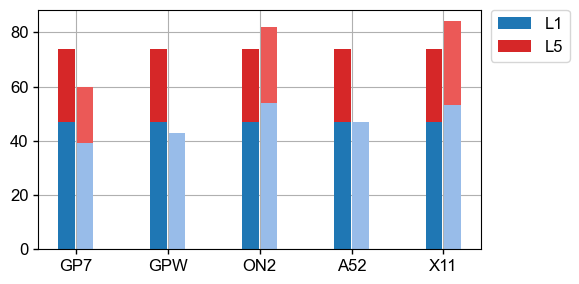

In [19]:
plotBarSignalsPerFrequency(logs, save=f"{output}/s3_freq_hist")

In [20]:
df = statsSignalsPerFrequency(logs, percent=True)
print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))

\begin{tabular}{lrr}
\toprule
device &    L1 &    L5 \\
\midrule
   GP7 &  83.0 &  77.8 \\
   GPW &  91.5 &   0.0 \\
   ON2 & 114.9 & 103.7 \\
   A52 & 100.0 &   0.0 \\
   X11 & 112.8 & 114.8 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4548/3327316197.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))


### Measurements

Pseudoranges

In [21]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


Rows removed 12   (0.022% -    99.98%)
Rows removed 69   (0.191% -    99.81%)
Rows removed 42   (0.060% -    99.94%)
Rows removed 3    (0.007% -    99.99%)
Rows removed 3    (0.004% -   100.00%)


,count,mean,std,min,50%,max
Pixel 7,55541.0,0.105540,10.293486,-243.123626,0.101814,264.024808
Pixel Watch,36039.0,0.095473,16.888374,-287.794451,0.089772,277.366452
Nord 2,69995.0,-0.023267,4.985501,-155.842295,-0.006655,137.541019
A52,44008.0,0.122815,14.754489,-282.783367,0.108926,297.405057
11T,67204.0,0.393620,22.108858,-280.576701,0.063933,269.135296


In [22]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{rrrrrr}
\toprule
    count &   mean &    std &      min &    50\% &     max \\
\midrule
55541.000 &  0.106 & 10.293 & -243.124 &  0.102 & 264.025 \\
36039.000 &  0.095 & 16.888 & -287.794 &  0.090 & 277.366 \\
69995.000 & -0.023 &  4.986 & -155.842 & -0.007 & 137.541 \\
44008.000 &  0.123 & 14.754 & -282.783 &  0.109 & 297.405 \\
67204.000 &  0.394 & 22.109 & -280.577 &  0.064 & 269.135 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4548/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


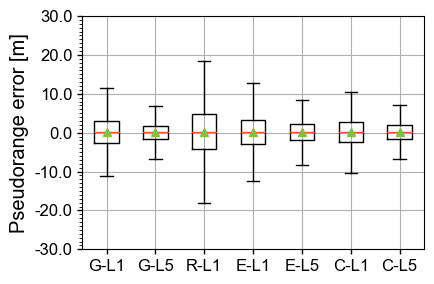

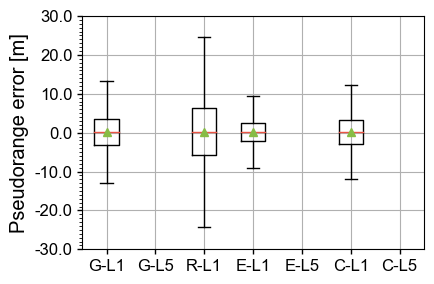

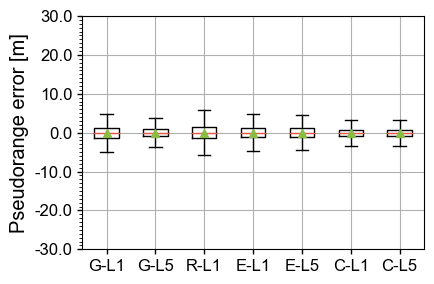

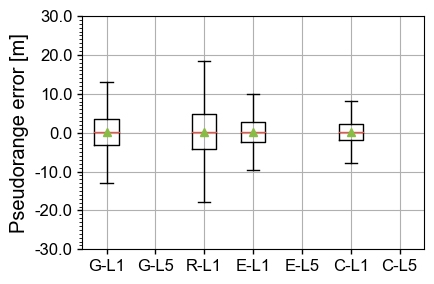

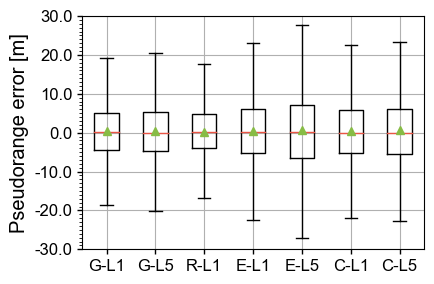

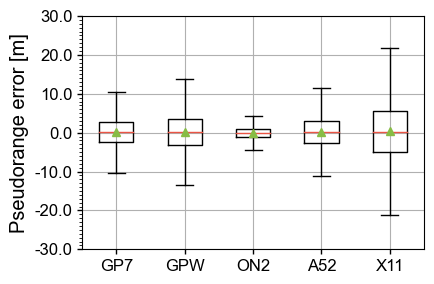

In [23]:

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,10], save=f"{output}/s3_pseudo")


In [24]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'pseudorange_error', 300)
    stats.append(log.ref.df['pseudorange_error'].describe(percentiles=[0.5, .667, .95, .997]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 6280 (5.419% -    94.58%)
--- Pixel Watch ---
Rows removed 0    (0.000% -   100.00%)
--- Nord 2 ---
Rows removed 0    (0.000% -   100.00%)
--- A52 ---
Rows removed 0    (0.000% -   100.00%)
--- 11T ---
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,66.7%,95%,99.7%,max
Pixel 7,109603.0,0.124944,18.945338,-299.097,0.074,0.117,0.6339,142.939462,299.505
Pixel Watch,109603.0,0.124944,18.945338,-299.097,0.074,0.117,0.6339,142.939462,299.505
Nord 2,109603.0,0.124944,18.945338,-299.097,0.074,0.117,0.6339,142.939462,299.505
A52,109603.0,0.124944,18.945338,-299.097,0.074,0.117,0.6339,142.939462,299.505
11T,109603.0,0.124944,18.945338,-299.097,0.074,0.117,0.6339,142.939462,299.505


In [25]:

# plotStatisticsDataBox(_logs, 
#                       'pseudorange_error', 
#                       'Pseudorange error [m]', 
#                       ('G', 'R', 'E', 'C'), 
#                       ('L1', 'L5'),
#                       lim=30,
#                       ticks=[1,10],
#                       mode='ref')


In [26]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssState_Str.values())].count()
    stats.append(log.raw[list(misc.GnssState_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

,Pixel 7,Pixel Watch,Nord 2,A52,11T
TRACK_UNKNOWN,0.000000,0.000000,0.000000,0.000000,0.000000
TRACK_CODE_LOCK,0.796581,0.622674,1.000000,1.000000,1.000000
TRACK_BIT_SYNC,0.858063,0.816309,0.699555,0.999683,0.657599
TRACK_SUBFRAME_SYNC,0.487535,0.471430,0.552515,0.998506,0.523744
TRACK_TOW_DECODED,0.370943,0.542483,0.828105,0.998506,0.807455
TRACK_MSEC_AMBIGUOUS,0.011378,0.001070,0.024854,0.000000,0.058690
TRACK_SYMBOL_SYNC,0.858978,0.816414,0.699555,0.001177,0.657599
TRACK_GLO_STRING_SYNC,0.148964,0.251821,0.147041,0.214417,0.133855
TRACK_GLO_TOD_DECODED,0.140349,0.208645,0.147041,0.214417,0.133855
TRACK_BDS_D2_BIT_SYNC,0.000069,0.000000,0.000000,0.000000,0.000000


Doppler

In [27]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


Rows removed 8    (0.014% -    99.99%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 1    (0.001% -   100.00%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,max
Pixel 7,57852.0,0.078776,0.399900,-9.536620,0.075058,29.153364
Pixel Watch,38266.0,0.082643,0.392799,-11.612106,0.081802,9.242383
Nord 2,71897.0,-0.046639,1.328623,-24.589798,-0.022335,20.666477
A52,44124.0,0.073247,0.735982,-10.523764,0.066348,6.519741
11T,71598.0,0.034706,0.821338,-15.820492,0.095356,15.941162


In [28]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{rrrrrr}
\toprule
    count &   mean &   std &     min &    50\% &    max \\
\midrule
57852.000 &  0.079 & 0.400 &  -9.537 &  0.075 & 29.153 \\
38266.000 &  0.083 & 0.393 & -11.612 &  0.082 &  9.242 \\
71897.000 & -0.047 & 1.329 & -24.590 & -0.022 & 20.666 \\
44124.000 &  0.073 & 0.736 & -10.524 &  0.066 &  6.520 \\
71598.000 &  0.035 & 0.821 & -15.820 &  0.095 & 15.941 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4548/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


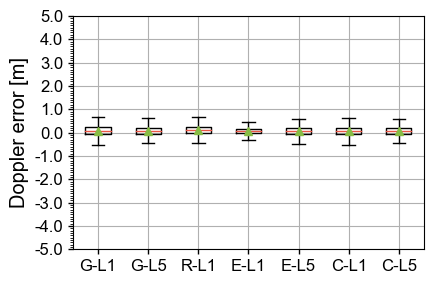

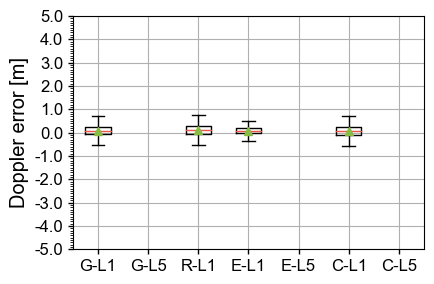

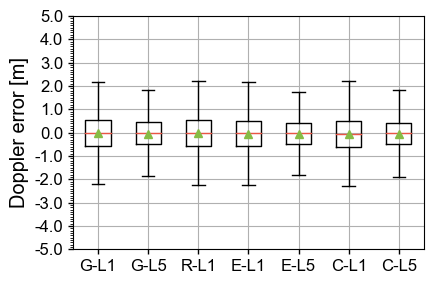

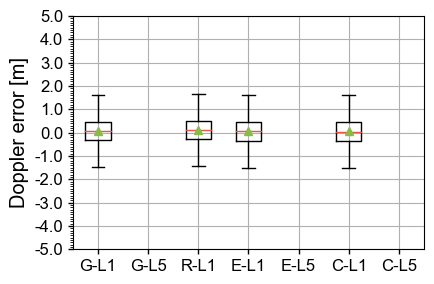

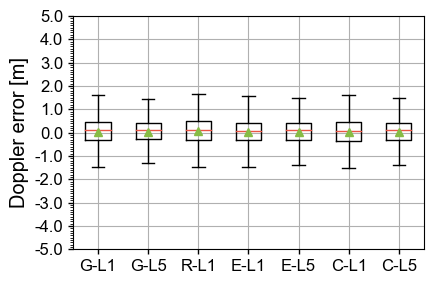

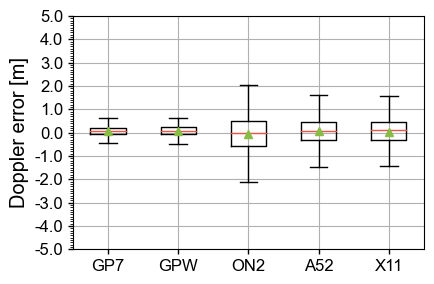

In [29]:

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=5,
                      ticks=[0.1,1], save=f"{output}/s3_doppler")

In [30]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'doppler_error', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 63   (0.054% -    99.95%)
--- Pixel Watch ---
Rows removed 0    (0.000% -   100.00%)
--- Nord 2 ---
Rows removed 0    (0.000% -   100.00%)
--- A52 ---
Rows removed 0    (0.000% -   100.00%)
--- 11T ---
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,66.7%,95%,99.7%,max
Pixel 7,115894.0,-0.427136,1.897533,-29.98,-0.337,0.048,1.93235,6.712963,27.478
Pixel Watch,115894.0,-0.427136,1.897533,-29.98,-0.337,0.048,1.93235,6.712963,27.478
Nord 2,115894.0,-0.427136,1.897533,-29.98,-0.337,0.048,1.93235,6.712963,27.478
A52,115894.0,-0.427136,1.897533,-29.98,-0.337,0.048,1.93235,6.712963,27.478
11T,115894.0,-0.427136,1.897533,-29.98,-0.337,0.048,1.93235,6.712963,27.478


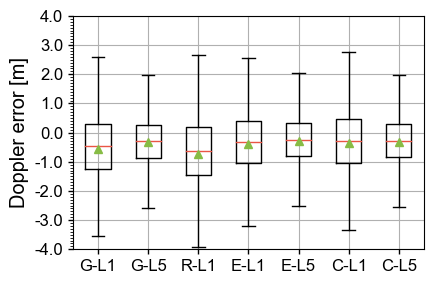

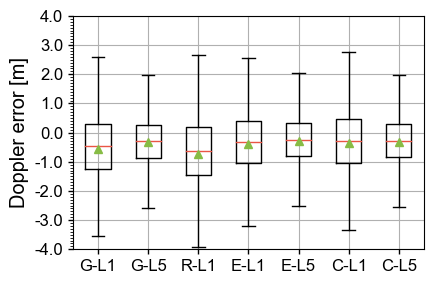

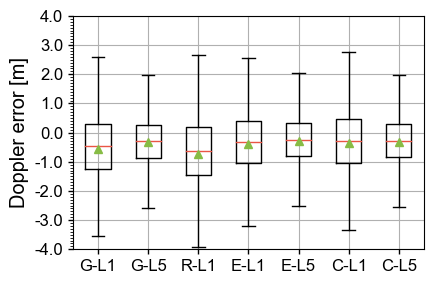

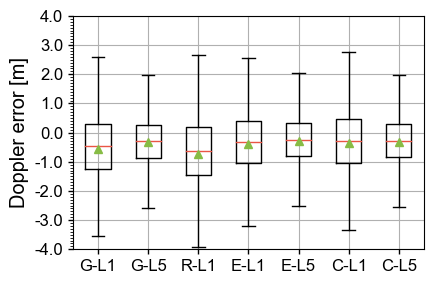

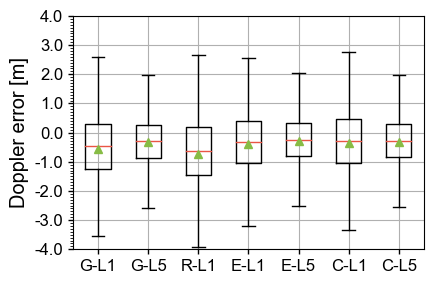

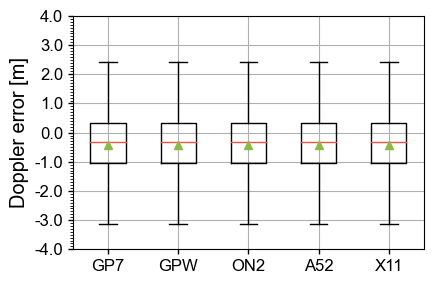

In [31]:

plotStatisticsDataBox(_logs, 
                      'doppler_error', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.1,1],
                      mode='ref')

Phases

In [32]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 30)
    stats.append(log.raw['PhaseError'].describe(percentiles=[0.5]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

Rows removed 219  (0.379% -    99.62%)
Rows removed 20   (0.052% -    99.95%)
Rows removed 1131 (1.575% -    98.43%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 873  (1.221% -    98.78%)


,count,mean,std,min,50%,max
Pixel 7,57581.0,0.095907,0.972091,-26.408116,0.078677,29.382838
Pixel Watch,38205.0,0.098338,0.820742,-26.192317,0.081414,19.709377
Nord 2,70686.0,-0.042426,1.334647,-29.953799,0.006696,29.333199
A52,44077.0,0.000000,0.000000,0.000000,0.000000,0.000000
11T,70641.0,0.046368,1.061446,-29.611211,0.113200,29.073059


In [33]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{rrrrrr}
\toprule
    count &   mean &   std &     min &   50\% &    max \\
\midrule
57581.000 &  0.096 & 0.972 & -26.408 & 0.079 & 29.383 \\
38205.000 &  0.098 & 0.821 & -26.192 & 0.081 & 19.709 \\
70686.000 & -0.042 & 1.335 & -29.954 & 0.007 & 29.333 \\
44077.000 &  0.000 & 0.000 &   0.000 & 0.000 &  0.000 \\
70641.000 &  0.046 & 1.061 & -29.611 & 0.113 & 29.073 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4548/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


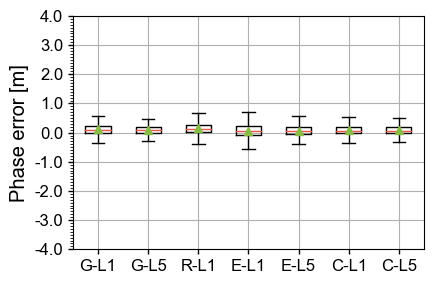

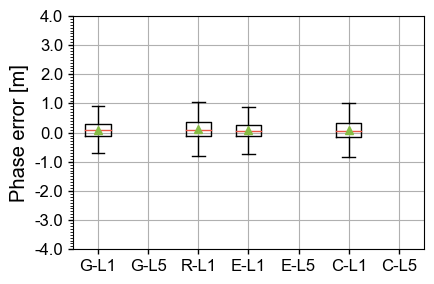

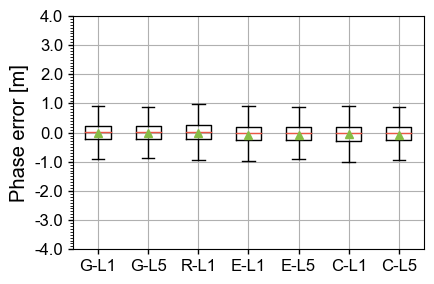

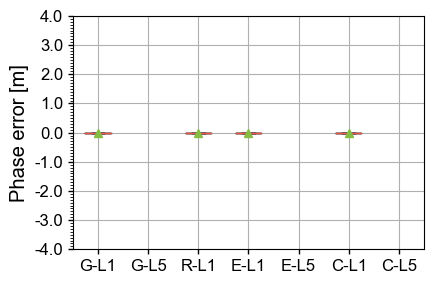

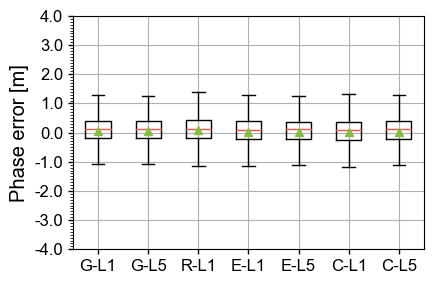

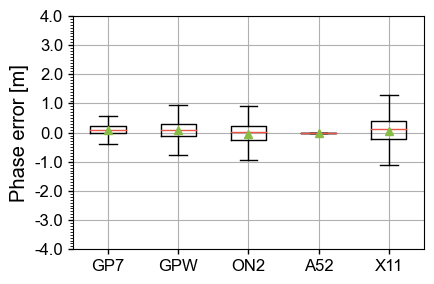

In [34]:

plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.1,1], save=f"{output}/s3_phase")
    

In [35]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'phase_error', 500)
    stats.append(log.ref.df['phase_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

--- Pixel 7 ---
Rows removed 7171 (6.188% -    93.81%)
--- Pixel Watch ---
Rows removed 0    (0.000% -   100.00%)
--- Nord 2 ---
Rows removed 0    (0.000% -   100.00%)
--- A52 ---
Rows removed 0    (0.000% -   100.00%)
--- 11T ---
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,66.7%,95%,99.7%,max
Pixel 7,108712.0,0.37629,25.265619,-497.6,0.334,0.516,1.449,145.296067,499.268
Pixel Watch,108712.0,0.37629,25.265619,-497.6,0.334,0.516,1.449,145.296067,499.268
Nord 2,108712.0,0.37629,25.265619,-497.6,0.334,0.516,1.449,145.296067,499.268
A52,108712.0,0.37629,25.265619,-497.6,0.334,0.516,1.449,145.296067,499.268
11T,108712.0,0.37629,25.265619,-497.6,0.334,0.516,1.449,145.296067,499.268


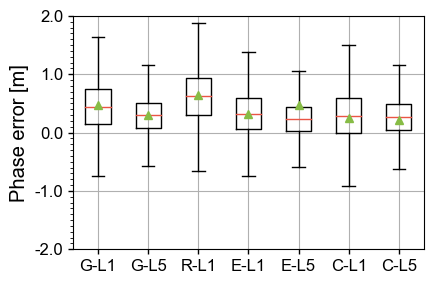

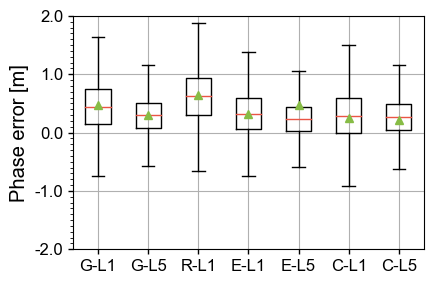

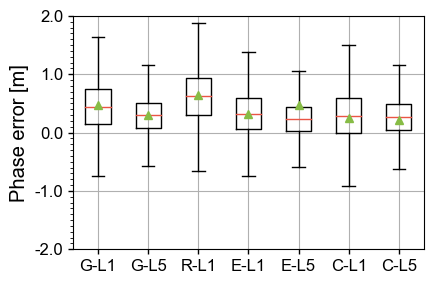

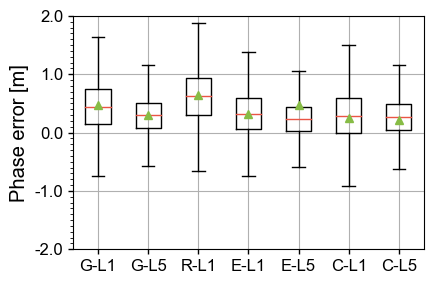

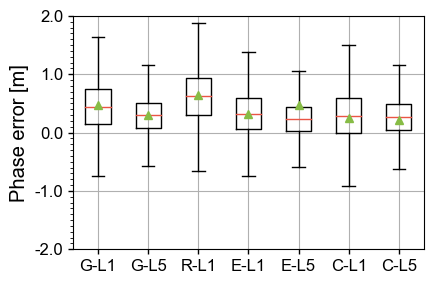

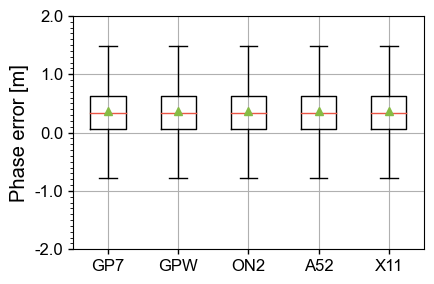

In [36]:

plotStatisticsDataBox(_logs, 
                      'phase_error', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.1,1],
                      mode='ref')

In [37]:
stats = []
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    stats.append(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

,Pixel 7,Pixel Watch,Nord 2,A52,11T
ADR_UNKNOWN,0.000000,0.000000,0.000000,0.0,0.000000
ADR_VALID,0.367352,0.146101,0.576285,0.0,0.645057
ADR_RESET,0.000000,0.000026,0.000000,0.0,0.000000
ADR_CYCLE_SLIP,0.067645,0.033569,0.294610,0.0,0.317234
ADR_HALF_CYCLE_RESOLVED,0.293595,0.066564,0.357974,0.0,0.390879
ADR_HALF_CYCLE_REPORTED,1.000000,1.000000,1.000000,1.0,1.000000


C/N0

In [38]:
_logs = copy.deepcopy(logs)
stats= []
for log in _logs:
    stats.append(log.raw['Cn0DbHz'].describe(percentiles=[0.5]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

,count,mean,std,min,50%,max
Pixel 7,57920.0,34.513589,8.247629,10.6,35.575186,52.026230
Pixel Watch,38309.0,27.028540,6.977561,12.1,28.204401,43.899483
Nord 2,71980.0,24.506882,11.127136,0.0,26.100000,50.448002
A52,44171.0,41.995445,6.502923,16.1,42.800000,58.100000
11T,71682.0,29.044533,7.250588,3.6,29.121000,48.805000


In [39]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))

\begin{tabular}{rrrrrr}
\toprule
  count &  mean &  std &  min &  50\% &  max \\
\midrule
57920.0 &  34.5 &  8.2 & 10.6 & 35.6 & 52.0 \\
38309.0 &  27.0 &  7.0 & 12.1 & 28.2 & 43.9 \\
71980.0 &  24.5 & 11.1 &  0.0 & 26.1 & 50.4 \\
44171.0 &  42.0 &  6.5 & 16.1 & 42.8 & 58.1 \\
71682.0 &  29.0 &  7.3 &  3.6 & 29.1 & 48.8 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4548/2174737608.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))


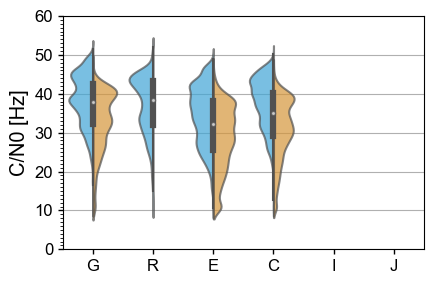

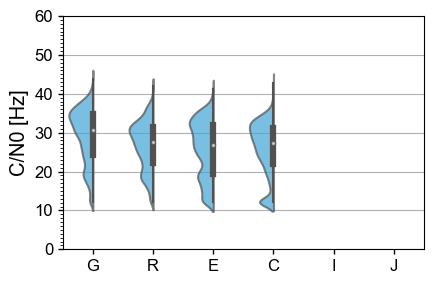

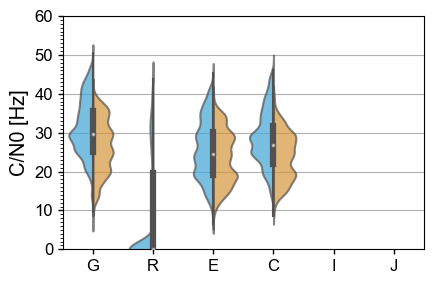

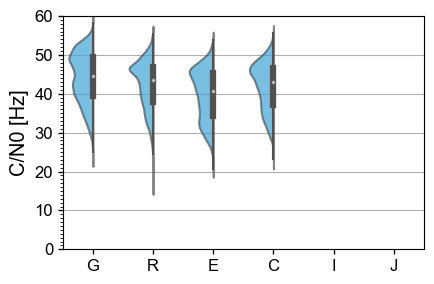

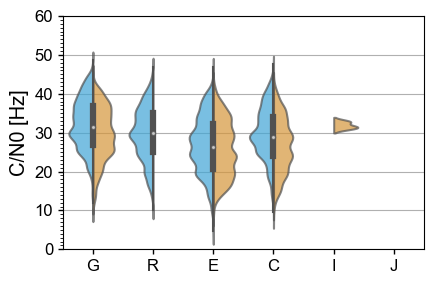

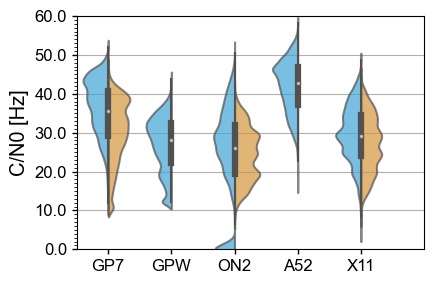

In [40]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10], save=f"{output}/s3_cn0")

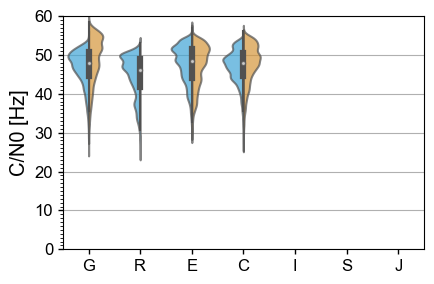

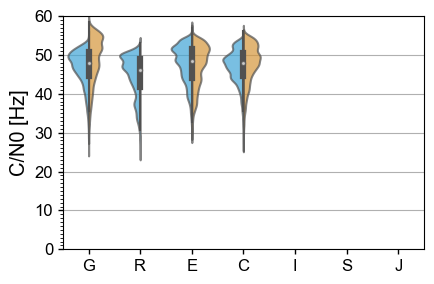

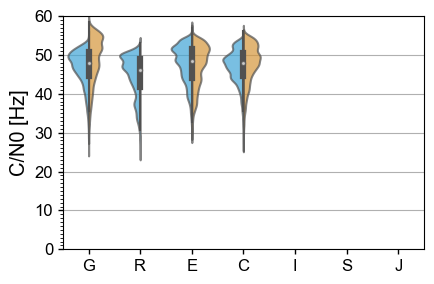

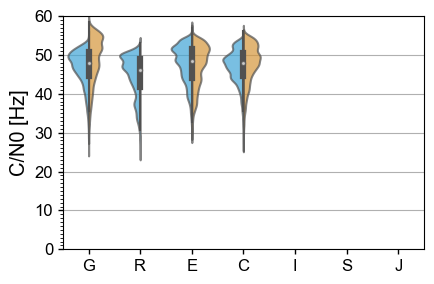

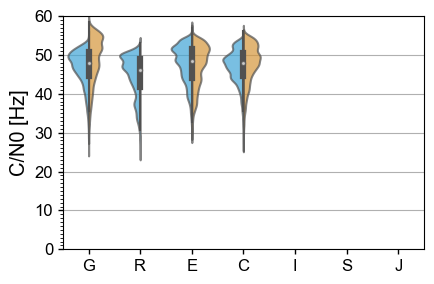

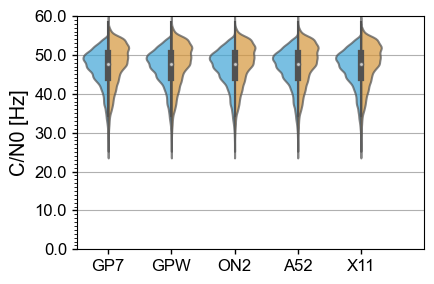

In [41]:
plotStatisticsDataViolin(
    _logs, 
    'snr', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10],
    mode='ref')